In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("./Real estate.csv")

In [3]:
df.head()

,No,transaction_date,house_age,distance_to_transportation,convenience_stores,latitude,longitude,house_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#we don't need Column No because it doesn't effect House Price
df = df.drop("No", axis = 1)

In [5]:
df.describe()

,transaction_date,house_age,distance_to_transportation,convenience_stores,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
#Computing Correlation Matrix to check the correlation between the Independent Variables
cor = df.corr()
cor.head()

,transaction_date,house_age,distance_to_transportation,convenience_stores,latitude,longitude,house_price
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_transportation,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307


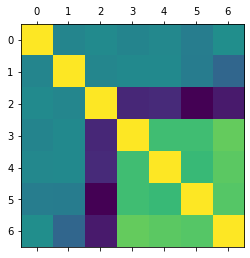

In [7]:
plt.matshow(cor)

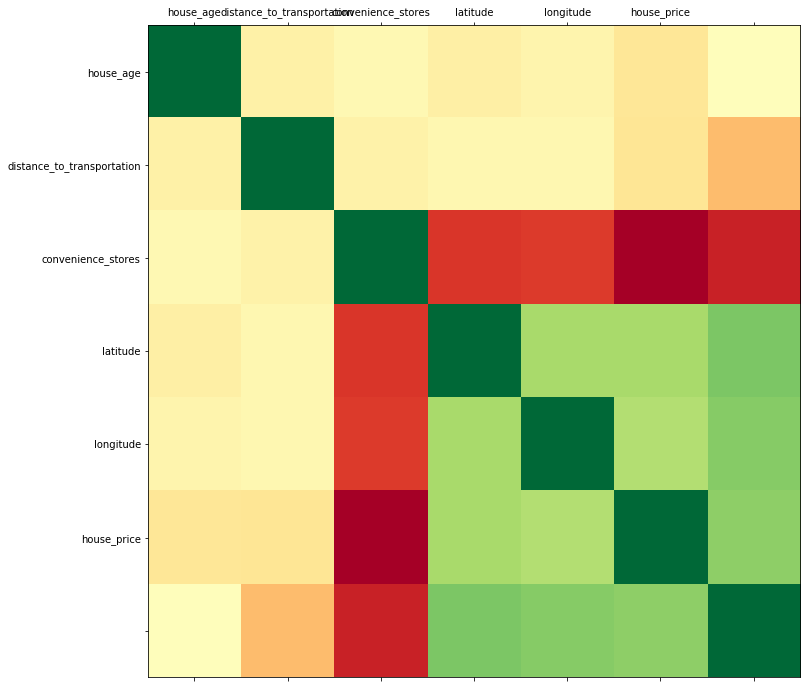

In [8]:
#Proper Visualization of Correlation
labels = [col for col in cor.columns]
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.matshow(cor, cmap = plt.cm.RdYlGn)

In [9]:
#Null Hypothesis if P value less than 0.05 then the Independent Variable effects the House Price
v = sm.add_constant(df[["transaction_date","house_age","distance_to_transportation","convenience_stores","latitude","longitude"]])
m = sm.OLS(df["house_price"], v).fit()
print(m.pvalues[1:7])

transaction_date              1.033686e-03
house_age                     1.064969e-11
distance_to_transportation    1.038560e-09
convenience_stores            3.835416e-09
latitude                      6.383415e-07
longitude                     7.982928e-01
dtype: float64


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
#From above P values we can see that the P value of Longitude is > 0.05 which means it doesn't effect the House Price
v = sm.add_constant(df[["transaction_date","house_age","distance_to_transportation","convenience_stores","latitude"]])
m = sm.OLS(df["house_price"], v).fit()
print(m.pvalues[1:6])

transaction_date              1.041420e-03
house_age                     1.038632e-11
distance_to_transportation    2.041199e-17
convenience_stores            3.174599e-09
latitude                      4.355024e-07
dtype: float64


In [11]:
#From above P values we can see that the P value of Transaction Date is < 0.05 but it has the next greatest P value
v = sm.add_constant(df[["house_age","distance_to_transportation","convenience_stores","latitude"]])
m = sm.OLS(df["house_price"], v).fit()
print(m.pvalues[1:5])

house_age                     1.954163e-11
distance_to_transportation    4.369704e-16
convenience_stores            1.942702e-09
latitude                      1.428030e-07
dtype: float64


In [12]:
#Filtering the dataframe from all the less used Data
df = df.drop(["transaction_date", "latitude", "longitude"], axis = 1)

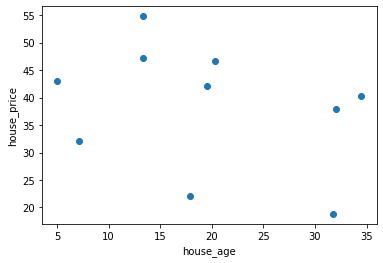

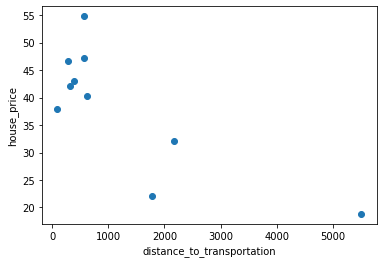

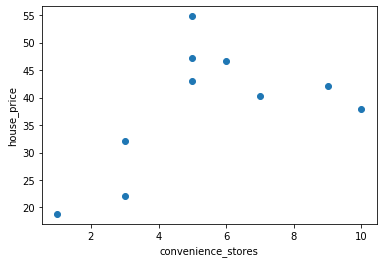

In [13]:
#Visualizing House Price with all the other Data
y = df["house_price"].tolist()
for i in df.columns.tolist()[0:3]:
    x = df[i].tolist()
    plt.plot(x[0:10], y[0:10], "o")
    plt.xlabel(i)
    plt.ylabel("house_price")
    plt.show()

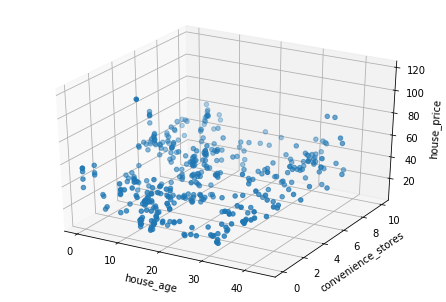

In [14]:
#Visualizing of house_age, convenience_stores and house_price with a Three Dimensional Figure
fig_ach = plt.figure()
ax_ach = Axes3D(fig_ach)
ax_ach.scatter(df["house_age"].values, df["convenience_stores"].values, df["house_price"].values)
ax_ach.set_xlabel("house_age")
ax_ach.set_ylabel("convenience_stores")
ax_ach.set_zlabel("house_price")
plt.show()

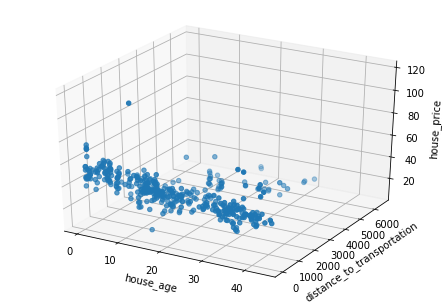

In [15]:
#Visualizing of house_age, distance_to_transportation and house_price with a Three Dimensional Figure
fig_adh = plt.figure()
ax_adh = Axes3D(fig_adh)
ax_adh.scatter(df["house_age"].values, df["distance_to_transportation"].values, df["house_price"].values)
ax_adh.set_xlabel("house_age")
ax_adh.set_ylabel("distance_to_transportation")
ax_adh.set_zlabel("house_price")
plt.show()


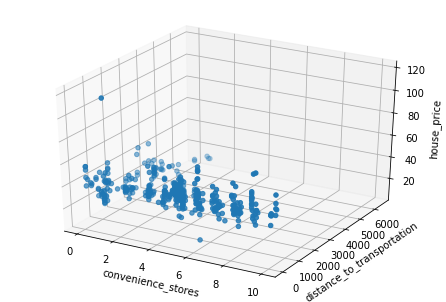

In [16]:
#Visualizing of convenience_stores, distance_to_transportation and house_price with a Three Dimensional Figure
fig_cdh = plt.figure()
ax_cdh = Axes3D(fig_cdh)
ax_cdh.scatter(df["convenience_stores"].values, df["distance_to_transportation"].values, df["house_price"].values)
ax_cdh.set_xlabel("convenience_stores")
ax_cdh.set_ylabel("distance_to_transportation")
ax_cdh.set_zlabel("house_price")
plt.show()

In [17]:
#Linear Regression Y =B0 + B1 . X where X is x_data has all the data from Independent Variables [house_age, distance_to_transportation, convenience_stores] and Y is y_data has all the data from Dependent Variable [house_price]
x_data = df[df.columns.values[0:3]]
y_data = df['house_price']

In [18]:
#Normalizing the data such that Mean is 0 and Standard Deviation is 1 because their ranges are different from each other
sc = StandardScaler()
x_data = sc.fit_transform(x_data)

In [19]:
#Calculating coefficients of the x which is b
def gradient_descent(x, y, b, a, itr):
    for i in range(itr):
        h = x.dot(b)
        loss = h-y
        gradient = x.T.dot(loss)/len(y)
        b = b - a * gradient
    return b

In [20]:
#Prediction here only dot product is used and no intercept because the intercept is taken as b[0] and is included in b
def pred(x, b):
    return x.dot(b)

In [21]:
#R^2 Score
def r_square(y_t, y_p):
    t = np.sum((y_t - y_t.mean()) ** 2)
    r = np.sum((y_p - y_t) ** 2)
    return 1-(r/t)

In [22]:
#Training Data and Testing Data
x_train = x_data[:300, :3]
x_train = np.c_[np.ones(len(x_train), dtype = "int64"), x_train]
y_train = y_data[:300]
x_test = x_data[300:,:3]
x_test = np.c_[np.ones(len(x_test),dtype = "int64"), x_test]
y_test = y_data[300:]

In [23]:
#Coeffecients are taken zero in the beginning
b = np.zeros(x_train.shape[1])
b = gradient_descent(x_train, y_train, b, 0.005, 2000)

In [24]:
#Prediction
y_val = pred(x_test, b).tolist()

In [25]:
#Computing R^2 Score
r_square(y_test, y_val)

0.5712464599924552

In [26]:
#Value from Data Set
y_test[0:10]

300    36.9
301    35.7
302    23.2
303    38.4
304    29.4
305    55.0
306    50.2
307    24.7
308    53.0
309    19.1
Name: house_price, dtype: float64

In [27]:
#Predicted Value
y_val[0:10]

[47.21667672516178,
 30.356668483247113,
 30.636404802635774,
 30.387640252435283,
 33.14139941286058,
 43.84665818881709,
 39.936817653271824,
 24.42288534236018,
 43.789296839459304,
 28.30874326298052]

In [28]:
#Polynomial Regression Y = B0 + B1 . X + B2 . X^2
pf = PolynomialFeatures(degree = 3)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.fit_transform(x_test)
b_poly = np.zeros(x_train_poly.shape[1])
b_poly = gradient_descent(x_train_poly, y_train, b_poly, 0.005, 2000)

In [29]:
#Prediction
y_val_poly = pred(x_test_poly, b_poly).tolist()

In [30]:
#Computing R^2 Score
r_square(y_test, y_val_poly)

0.6280031504696121

In [31]:
#Predicted Value
y_val_poly[0:10]

[54.71040250908207,
 32.49289820472105,
 24.623514844010508,
 32.97980334242736,
 27.137818679340704,
 44.38675225732782,
 45.333530421631984,
 23.318354177874085,
 44.29070875470357,
 21.71768394865516]

In [32]:
#From the R Square Score we can say that the Polynomial Regression fits better to the data set than the Linear Regression
y_test[0:10]

300    36.9
301    35.7
302    23.2
303    38.4
304    29.4
305    55.0
306    50.2
307    24.7
308    53.0
309    19.1
Name: house_price, dtype: float64